# Machine Production

A product can be produced on four different machines.
Each machine has a fixed setup cost, variable production
costs per-unit-processed, and a production capacity given in
Table 15. A total of 2,000 units of the product must be
produced. Formulate an IP whose solution will tell us how
to minimize total costs.

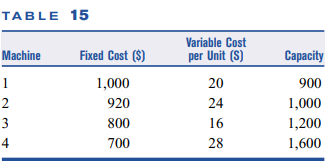

## Conjuntos

$ i = \text{Máquina indexada por } i$

## Parámetros

$ CV_{i} = \textrm{Costo por unidad producida de la máquina } i$

$ CF_{i} = \textrm{Costo fijo de colocar la máquina } i $

$ C_{i} = \textrm{Capacidad de la máquina } i $

# Variables de decisión

$ x_{i} = \textrm{Cantidad de productos producidos } i $

$ y_{i} = \textrm{1 se utiliza la máquina } i \textrm{, 0 lo contrario} $

## Función Objetivo

$$ \sum_{i = 1}^{n} CV_{i}\: x_{i} + \sum_{i = 1}^{n} CF_{i}\: y_{i}$$

## Restricciones

No se puede rebasar la capacidad,

$$ x_{i} \leq C_{i}, \forall i $$

Restricción de flujo que une las variables binarias con las de las unidades,

$$ x_{i} \leq M y_{i},\forall i $$

Se deben producir 2000 unidades,

$$ \sum_{i = 1}^{n}x_{i} = 2000 $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 22.0 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [8]:
# Conjuntos
máquinas = range(4)

In [9]:
CV = [20, 24, 16, 28]

CF = [1000, 920, 800, 700]

C = [900, 1000, 1200, 1600]

In [10]:
# Crear la instancia del modelo
model = LpProblem(name="Machine_Production", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (máquinas), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (máquinas), 0, 1, LpInteger)

# Función objetivo
model += lpSum([CV[i] * X[i] for i in máquinas]) + lpSum([CF[i] * Y[i] for i in máquinas])

# Restricciones
for i in máquinas:
    model += X[i] <= C[i]
    model += X[i] <= 10000000 * Y[i]

model += lpSum([X[i] for i in máquinas]) == 2000

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costos totales = $", value(model.objective))

Status: Optimal
X_0 = 800.0
X_1 = 0.0
X_2 = 1200.0
X_3 = 0.0
Y_0 = 1.0
Y_1 = 0.0
Y_2 = 1.0
Y_3 = 0.0
Costos totales = $ 37000.0
